In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.special as sps
import pandas as pd
import itertools
import os

# gamma distribution

In [3]:
shape, scale = 2., 1.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

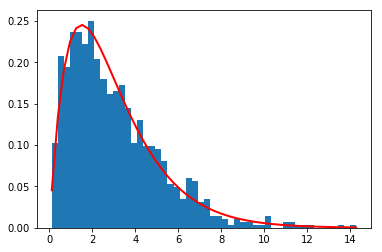

In [4]:
count, bins, ignored = plt.hist(s, 50, normed=True) #density=True
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [5]:
fixation = random.sample(s, 15)
fixation = np.random.choice(s, size=[5,2,15], replace=True)

In [6]:
fixation[4][1]

array([  3.63220316,   7.37567075,   1.06293598,   4.31387603,
         1.26993996,   3.87639921,   2.45910974,   6.73700583,
        10.09189907,   2.10428557,   1.98036494,   4.40066541,
         4.30279552,   3.97062965,   1.89413099])

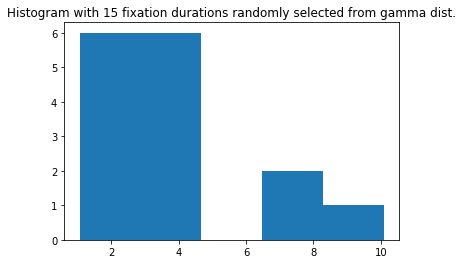

In [7]:
plt.hist(fixation[4][1], bins='auto')  
plt.title("Histogram with 15 fixation durations randomly selected from gamma dist.")
plt.show()

# create pandas dataframe

In [8]:
condition_1 = pd.DataFrame()
condition_1['fixation'] = fixation[4][1]
condition_1['cue'] = 2
condition_1['target'] = 1.5
condition_1['cue_onset'] = np.nan
condition_1['target_onset'] =np.nan
condition_1['fixation_onset'] =np.nan

In [9]:
condition_1

,fixation,cue,target,cue_onset,target_onset,fixation_onset
0,3.632203,2,1.5,NaN,NaN,NaN
1,7.375671,2,1.5,NaN,NaN,NaN
2,1.062936,2,1.5,NaN,NaN,NaN
3,4.313876,2,1.5,NaN,NaN,NaN
4,1.269940,2,1.5,NaN,NaN,NaN
5,3.876399,2,1.5,NaN,NaN,NaN
6,2.459110,2,1.5,NaN,NaN,NaN
7,6.737006,2,1.5,NaN,NaN,NaN
8,10.091899,2,1.5,NaN,NaN,NaN
9,2.104286,2,1.5,NaN,NaN,NaN


---------- >8 --------------------------------------------------

In [184]:
for index, row in itertools.islice(condition_1.iterrows(), 0, None):
#     condition_1.iloc[0 'fixation_onset'] = condition_1[0,'fixation']
    condition_1.loc[index,'cue_onset'] = row.fixation_onset + row.cue
    condition_1.loc[index,'target_onset'] = row.cue_onset + row.target
    condition_1.loc[index,'fixation_onset'] = row.fixation + row.target_onset

In [192]:
condition_1
# fixation onset 0
condition_1.loc[0,'fixation_onset'] = condition_1.loc[0,'fixation'].copy()
# cue onset 0
condition_1.loc[0,'cue_onset'] = condition_1.loc[0,'fixation_onset'].copy() + 2
# target onset 0
condition_1.loc[0,'target_onset'] = condition_1.loc[0,'cue_onset'].copy() + 1.5
# target onset 0 + fixation 1

condition_1['target_shifted'] = condition_1.target_onset.shift()
compared = pd.concat([condition_1['fixation'] + condition_1['target_shifted']], axis=1)

condition_1['S'] = compared.min(axis=1)

---------- >8 --------------------------------------------------

# randomize conditions

In [10]:
trials = [np.repeat('con',8) , np.repeat('incon',2) , np.repeat('neu',5)]

In [11]:
C = list(itertools.repeat('con', 8))
I = list(itertools.repeat('incon', 2))
N = list(itertools.repeat('neu', 5))
trials = C + I + N

In [12]:
random.shuffle(trials)

In [13]:
random.shuffle(trials)
df = pd.DataFrame()
df['trial_type'] = trials

# create EV files

In [14]:
cue_onset_neu = pd.DataFrame()
cue_onset_con = pd.DataFrame()
cue_onset_incon = pd.DataFrame()
target_onset_neu = pd.DataFrame()
target_onset_con = pd.DataFrame()
target_onset_incon = pd.DataFrame()
# for index in range(1,11):
index = 1   
sheetname = 'c' + str(index)
# load xlsx
df = pd.read_excel('/Users/h/Dropbox/Projects/SI.01/coding/design/onset_time.xlsx', sheet_name = sheetname)

# create separate pandas
# d = {index: label for index, label in df.groupby('trial_type')}
d = {k: df[df['trial_type'] == k] for k in df['trial_type'].unique()}
# create EV files based on sheet

# 6 files
# CUE ____________________
# cue_onset neu
cue_onset_neu['onset'] = d['neu']['cue_onset'].copy().reset_index(drop=True)
cue_onset_neu['duration'] = 2
cue_onset_neu['magnitude'] = 1
# cue_onset con
cue_onset_con['onset'] = d['con']['cue_onset'].copy().reset_index(drop=True)
cue_onset_con['duration'] = 2
cue_onset_con['magnitude'] = 1
# cue_onset incon
cue_onset_incon['onset'] = d['incon']['cue_onset'].copy().reset_index(drop=True)
cue_onset_incon['duration'] = 2
cue_onset_incon['magnitude'] = 1

# TARGET ____________________
# target_onset neu
target_onset_neu['onset'] = d['neu']['target_onset'].copy().reset_index(drop=True)
target_onset_neu['duration'] = 1.5
target_onset_neu['magnitude'] = 1
# target_onset con
target_onset_con['onset'] = d['con']['target_onset'].copy().reset_index(drop=True)
target_onset_con['duration'] = 1.5
target_onset_con['magnitude'] = 1
# target_onset incon
target_onset_incon['onset'] = d['incon']['target_onset'].copy().reset_index(drop=True)
target_onset_incon['duration'] = 1.5
target_onset_incon['magnitude'] = 1

# SAVE _________________________
sub_run_dir = '/Users/h/Dropbox/Projects/SI.01/coding/data/sub-01/run-01'
cue_onset_neu_fname = os.sep.join([sub_run_dir, 'face_CUE_neu.txt'])
cue_onset_neu.to_csv(cue_onset_neu_fname, index = False, header = False, sep = '\t')

cue_onset_con_fname = os.sep.join([sub_run_dir, 'face_CUE_con.txt'])
cue_onset_con.to_csv(cue_onset_con_fname, index = False, header = False, sep = '\t')

cue_onset_incon_fname = os.sep.join([sub_run_dir, 'face_CUE_incon.txt'])
cue_onset_incon.to_csv(cue_onset_incon_fname, index = False, header = False, sep = '\t')

target_onset_neu_fname = os.sep.join([sub_run_dir, 'face_TARGET_neu.txt'])
target_onset_neu.to_csv(target_onset_neu_fname, index = False, header = False, sep = '\t')

target_onset_con_fname = os.sep.join([sub_run_dir, 'face_TARGET_con.txt'])
target_onset_con.to_csv(target_onset_con_fname, index = False, header = False, sep = '\t')

target_onset_incon_fname = os.sep.join([sub_run_dir, 'face_TARGET_incon.txt'])
target_onset_incon.to_csv(target_onset_incon_fname, index = False, header = False, sep = '\t')

In [15]:
d['neu']

,fixation,cue,target,fixation_onset,cue_onset,target_onset,trial_type
2,3.110786,2,1.5,12.586643,14.586643,16.086643,neu
5,1.149081,2,1.5,32.557437,34.557437,36.057437,neu
6,6.409093,2,1.5,42.466530,44.466530,45.966530,neu
10,2.622609,2,1.5,65.411824,67.411824,68.911824,neu
14,1.156500,2,1.5,94.599945,96.599945,98.099945,neu


In [16]:
cue_onset_neu['onset']
cue_onset_con['onset']
cue_onset_incon['onset']
target_onset_neu['onset']
target_onset_con['onset']
target_onset_incon['onset']

0    58.820807
1    82.886027
Name: onset, dtype: float64

In [22]:
np.mean(df.fixation)

3.0399963333333337